<div dir = rtl>
به نام خدا
</div>


<div dir = rtl>
در این بخش، تعداد مشتری‌ها در سیستم با توجه به دو آستانه کنترل پذیرش و افزایش سرعت، شبیه‌سازی شده است. 
 این شبیه‌سازی‌ها در راستای مقاله اصلی، یعنی کنترل صف در بیمارستان  می‌باشد.
</div>

<div dir = rtl>
ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنیم.
</div>

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot


<div dir = rtl>

سپس برای متغیرها، یک مقداردهی اولیه انجام خواهیم داد. توجه داریم که فرایند ورود مشتری‌ها، فرایندی پواسون با نرخ lambda و توزیع خدمات مشتری‌‌ها، نمایی با نرخ mu می‌باشد.
lambda و mu در طول زمان و با توجه به شرایط، متغیر خواهند بود:



* اگر در آن لحظه، تعداد مشتری‌ها در سیستم از آستانه کنترل پذیرش کمتر و از آستانه افزایش سرعت بیشتر باشد: lambda = lambda_H , mu = mu_H 


* اگر در آن لحظه، تعداد مشتری‌ها در سیستم در آن لحظه از آستانه کنترل پذیرش بیشتر و از آستانه افزایش سرعت کمتر باشد: lambda = lambda_L , mu = mu_L  


* اگر در آن لحظه، تعداد مشتری‌ها در سیستم در آن لحظه از آستانه کنترل پذیرش کمتر و از آستانه افزایش سرعت کمتر باشد: lambda = lambda_H , mu = mu_L  


* اگر در آن لحظه، تعداد مشتری‌ها در سیستم در آن لحظه از آستانه کنترل پذیرش بیشتر و از آستانه افزایش سرعت بیشتر باشد: lambda = lambda_L , mu = mu_H 



در لحظه شروع ( زمان صفر)تعداد بیماران حاضر در سیستم، بیمارن ورودی و خروجی، صفر در نظر گرفته می‌شود.

همچنین لازم به ذکر است که سیستم، چند سروره می‌باشد.
</div>

In [ ]:
lambda_L = 50
lambda_H = 78
mu_L = 0.2
mu_H = 0.2857
N = 400
n = 0 
new_time = 0 
n_A = 0
n_D = 0
arrival_time_list = []
departure_time_list = []
n_list = []
time_list = []
na = 100
ns = 100

<div dir = rtl>
سرورها را با استفاده از لیست زیر می‌سازیم.
</div>

In [ ]:
servers = []
for _ in range(N):
    servers.append(0)

<div dir = rtl>
تابعی که در ادامه آورده شده است؛ برای انجام محاسبات در بخش بعد، مورد استفاده قرار خواهد گرفت و تعدادی از عناصر مشخص شده را از لیست مورد نظر حذف خواهد کرد.
</div>

In [ ]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

<div dir = rtl>
ابتدا مشخص می‌کنیم که اتفاق بعدی در سیستم، در چه زمانی رخ خواهد داد. برای این کار، باید کمینه دو متغیر نمایی را محاسبه کنیم. همچنین می‌دانیم که کمینه دو متغیر نمایی برابر با متغیری نمایی با پارامتر جمعشان خواهد بود.

پس از مشخص شدن زمان اتفاق بعدی، به بررسی این موضوع خواهیم پرداخت که در زمان مشخص‌ ‌شده، ورود اتفاق افتاده است یا خروج. احتمال هر کدام از این رویداد‌ها نیز، متناسب با پارامتر آن‌ها خواهد بود.


* اگر ورود اتفاق بیفتد : 

      به تعداد مشتری‌های موجود در سیستم و به تعداد مشتری‌های ورودی، یکی اضافه خواهد شد.
      
      
* اگر خروج اتفاق بیفتد : 

      از تعداد مشتری‌های موجود در سیستم کاسته و به تعداد مشتری‌های خروجی اضافه خواهد شد. اعداد نشانده‌ شده در عناصر موجود در لیست سرورها، بیانگر این خواهند بود که پشت آن سرور، چند مشتری وجود خواهد داشت که این عدد، شامل فردی که در سیستم حضور دارد؛ به همراه افرادی که در صف انتظار برای گرفتن خدمات از آن سرور هستند؛ می‌باشد. برای اینکه بخواهیم نشان دهیم که فردی از سیستم خارج شده است؛ یکی از عناصر ناصفر موجود در لیست سرورها را به تصادف انتخاب می‌کنیم. سپس از آن عدد، یک واحد کم خواهیم کرد.

</div>

In [ ]:
for _ in range (100000): 
    
    
    if n < na and n <ns:
        
        lambda_ = lambda_H
        mu_ = mu_L
        
        
    elif n > na and n > ns:
        
        lambda_ = lambda_L
        mu_ = mu_H
        
        
    elif n < ns and n > na :
        
        lambda_ = lambda_L
        mu_ = mu_L
        
    elif n > ns and n < na:
        
        lambda_ = lambda_H
        mu_ = mu_H
        
    
    
    
    time = np.random.exponential(1/((n*mu_)+ lambda_))
    #print(time)
    new_time += time
    time_list.append(new_time)
    #print(new_time)

    probability_of_arrival = lambda_ / ((n*mu_)+ lambda_)
    probability_of_departure = (n*mu_) / ((n*mu_)+ lambda_)
    events = ["arrival","departure"]
    distributions = [probability_of_arrival,probability_of_departure]
    random_events = np.random.choice(events, 1, True, distributions)
    #print(random_events)

    if random_events == "arrival":
        n += 1
        n_A += 1
        arrival_time = new_time
        arrival_time_list.append(arrival_time)
        servers.sort()
        servers[0] += 1

    elif random_events == "departure":

        n -= 1
        n_D += 1
        departure_time = new_time
        departure_time_list.append(departure_time)
        number_of_empty_servers = servers.count(0)
        alternative_servers = remove_values_from_list(servers,0)
        random_index = random.randint(0,len(alternative_servers)-1)
        alternative_servers[random_index] -= 1
        for _ in range(number_of_empty_servers):
            alternative_servers.append(0)
        servers = alternative_servers
        
    #print(n)
    n_list.append(n)
    
        
    new_time = time

print(n_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 100, 101, 102, 103, 102, 103, 104, 105, 104, 105, 106, 105, 106, 107, 108, 109, 108, 107, 108, 107, 108, 107, 108, 107, 108, 109, 108, 107, 108, 109, 110, 109, 110, 109, 108, 109, 110, 111, 112, 113, 112, 113, 112, 111, 110, 111, 110, 111, 110, 111, 112, 113, 112, 111, 112, 113, 112, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 120, 121, 120, 121, 122, 121, 120, 119, 118, 117, 118, 117, 116, 115, 116, 117, 118, 119, 120, 119, 120, 119, 118, 119, 120, 121, 122, 123, 122, 123, 122, 123, 122, 121, 120, 121, 122, 123, 124, 125, 126, 125, 126, 127, 128, 127, 128, 127, 126, 1

<div dir = rtl>
سپس به بررسی توزیع تعداد مشتری‌ها و همچنین نمودار فراوانی آن‌ها خواهیم پرداخت.

</div>

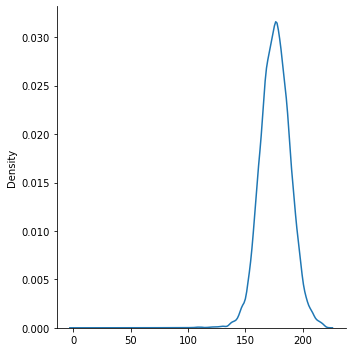

In [ ]:
sns.displot(n_list,kind="kde")

In [ ]:
i_list = []
for i in n_list:
    count = n_list.count(i)
    i_list.append(count)

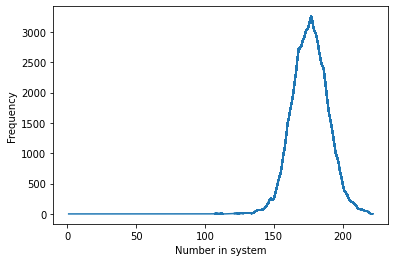

In [ ]:
plt.plot(n_list ,i_list)
plt.xlabel('Number in system')
plt.ylabel('Frequency')
plt.show()  

<div dir = rtl>

که نمودارها مشابه با توزیع گاما خواهند بود.
</div>

<div dir = rtl>

در انتها به محاسبه امید ریاضی طول صف، احتمال کنترل پذیرش، احتمال افزایش سرعت و احتمال انتظار بیماران خواهیم پرداخت.
</div>

In [ ]:
# E (X - N) +
element_list = []
for element in n_list:
    ele  = max(0,element - N)
    element_list.append(ele)
print(statistics.mean(element_list))
print(statistics.mean(element_list) / math.sqrt(N) )
print(statistics.mean(element_list) / N)

0
0.0
0.0


In [ ]:
main_len = len(element_list)

In [ ]:
element_list.sort()
num = element_list.count(0)
for _ in range(num):
    element_list.remove(element_list[0])
    
secondary_len = len(element_list)

In [ ]:
probability_of_wait = secondary_len / main_len

In [ ]:
probability_of_wait

0.0

In [ ]:
larger_elements = [element for element in n_list if element > na]
number_of_elements = len(larger_elements)
probability_of_admission_control = number_of_elements / len(n_list)
print(probability_of_admission_control)

0.99895


In [ ]:
larger_elements = [element for element in n_list if element > ns]
number_of_elements = len(larger_elements)
probability_of_speedup = number_of_elements / len(n_list)
print(probability_of_speedup)

0.99895
